# 4 - Results

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
dataset_file = "dataset/gdpr-br-qa.jsonl"
df_dataset = pd.read_json(dataset_file, lines=True, encoding='utf-8')

In [3]:
EXPERIMENTS = [
    "no_context_gpt-4o-mini-2024-07-18",
    "rag_3_gpt-4o-mini-2024-07-18",
    "with_gdpr_gpt-4o-mini-2024-07-18",
    
    "no_context_llama-3.3-70b-versatile",
    "rag_3_llama-3.3-70b-versatile",
    "with_gdpr_llama-3.3-70b-versatile",
    
    "no_context_deepseek-chat",
    "rag_3_deepseek-chat",
    "with_gdpr_deepseek-chat",
    
    "no_context_sabia-3-2024-12-11",
    "rag_3_sabia-3-2024-12-11",
    "with_gdpr_sabia-3-2024-12-11",
]

POSSIBLE_ANSWERS = ["A", "B", "C", "D", "E", "Certo", "Errado"]

In [4]:
def calcula_aderencia_ao_prompt(df):
    df_aderencia = df.copy()
    
    for exp in EXPERIMENTS:
        df_aderencia[exp] = df[exp].isin(POSSIBLE_ANSWERS)

    return df_aderencia

In [5]:
def calcular_resultados(df):
    df_result = df.copy()
    
    for exp in EXPERIMENTS:
        df_result[exp] = df['Answer'] == df[exp]

    return df_result

In [6]:
def normalizar_resposta_string(valor):
    # Se o valor for um dos possíveis, está certo e não faz nada
    if valor in POSSIBLE_ANSWERS:
        return valor

    # Se a resposta começar com algumas frases, remove essas frases:
    frases_para_remover = ["A resposta correta é a alternativa: ",
                           "A resposta correta é a alternativa ",
                           "A resposta é "]
    for para_remover in frases_para_remover:
        if valor.startswith(para_remover):
            valor = valor[len(para_remover):]
        
    # Tenta tratar o caso em que o LLM copia a resposta (por exemplo: "A) Apenas I, II e III").
    # E o caso dele colocar uma resposta possível e botar um ponto final (por exemplo: "Errado.")
    # Nesses casos, retorna só o valor da resposta
    for ans in POSSIBLE_ANSWERS:
        if valor.startswith(ans + ".") or valor.startswith(ans + ")"):
            return ans  # Retorna o valor base encontrado em POSSIBLE_ANSWERS

    # Se não cair nas regras acima, retorna do jeito errado mesmo
    return valor
        
def normalizar_respostas(df):
    df_tratado = df.copy()  # Copia a coluna ID
    
    #Aplicando a normalização para cada coluna de EXPERIMENTS
    for exp in EXPERIMENTS:
        df_tratado[exp] = df[exp].apply(normalizar_resposta_string)
    
    return df_tratado

In [7]:
print('########### ADERÊNCIA AO PROMPT ###########')
df_aderencia = calcula_aderencia_ao_prompt(df_dataset)
df_aderencia[EXPERIMENTS].mean()

########### ADERÊNCIA AO PROMPT ###########


no_context_gpt-4o-mini-2024-07-18     0.992857
rag_3_gpt-4o-mini-2024-07-18          0.988571
with_gdpr_gpt-4o-mini-2024-07-18      0.938571
no_context_llama-3.3-70b-versatile    0.904286
rag_3_llama-3.3-70b-versatile         0.934286
with_gdpr_llama-3.3-70b-versatile     0.301429
no_context_deepseek-chat              1.000000
rag_3_deepseek-chat                   1.000000
with_gdpr_deepseek-chat               1.000000
no_context_sabia-3-2024-12-11         0.977143
rag_3_sabia-3-2024-12-11              0.978571
with_gdpr_sabia-3-2024-12-11          0.842857
dtype: float64

In [8]:
print('########### ADERÊNCIA AO PROMPT - APÓS NORMALIZAÇÃO DOS RESULTADOS ###########')
df_aderencia = calcula_aderencia_ao_prompt(normalizar_respostas(df_dataset))
df_aderencia[EXPERIMENTS].mean()

########### ADERÊNCIA AO PROMPT - APÓS NORMALIZAÇÃO DOS RESULTADOS ###########


no_context_gpt-4o-mini-2024-07-18     1.000000
rag_3_gpt-4o-mini-2024-07-18          0.998571
with_gdpr_gpt-4o-mini-2024-07-18      0.995714
no_context_llama-3.3-70b-versatile    0.984286
rag_3_llama-3.3-70b-versatile         0.965714
with_gdpr_llama-3.3-70b-versatile     0.972857
no_context_deepseek-chat              1.000000
rag_3_deepseek-chat                   1.000000
with_gdpr_deepseek-chat               1.000000
no_context_sabia-3-2024-12-11         1.000000
rag_3_sabia-3-2024-12-11              1.000000
with_gdpr_sabia-3-2024-12-11          1.000000
dtype: float64

In [9]:
print('########### RESULTADOS SEM TRATAR A RESPOSTA ###########')
df_results = calcular_resultados(df_dataset)
df_results[EXPERIMENTS].mean()

########### RESULTADOS SEM TRATAR A RESPOSTA ###########


no_context_gpt-4o-mini-2024-07-18     0.757143
rag_3_gpt-4o-mini-2024-07-18          0.838571
with_gdpr_gpt-4o-mini-2024-07-18      0.832857
no_context_llama-3.3-70b-versatile    0.731429
rag_3_llama-3.3-70b-versatile         0.825714
with_gdpr_llama-3.3-70b-versatile     0.277143
no_context_deepseek-chat              0.850000
rag_3_deepseek-chat                   0.905714
with_gdpr_deepseek-chat               0.941429
no_context_sabia-3-2024-12-11         0.867143
rag_3_sabia-3-2024-12-11              0.884286
with_gdpr_sabia-3-2024-12-11          0.780000
dtype: float64

In [10]:
print('########### RESULTADOS TRATANDO A RESPOSTA ###########')
df_results = calcular_resultados(normalizar_respostas(df_dataset))
df_results[EXPERIMENTS].mean()

########### RESULTADOS TRATANDO A RESPOSTA ###########


no_context_gpt-4o-mini-2024-07-18     0.761429
rag_3_gpt-4o-mini-2024-07-18          0.841429
with_gdpr_gpt-4o-mini-2024-07-18      0.862857
no_context_llama-3.3-70b-versatile    0.784286
rag_3_llama-3.3-70b-versatile         0.847143
with_gdpr_llama-3.3-70b-versatile     0.871429
no_context_deepseek-chat              0.850000
rag_3_deepseek-chat                   0.905714
with_gdpr_deepseek-chat               0.941429
no_context_sabia-3-2024-12-11         0.887143
rag_3_sabia-3-2024-12-11              0.902857
with_gdpr_sabia-3-2024-12-11          0.918571
dtype: float64

In [13]:
df_results = calcular_resultados(normalizar_respostas(df_dataset))
media_resultados = df_results[EXPERIMENTS].mean()

def get_media(tipo_experimento, modelo):
    tipo_experimento = {
        "No ctx": "no_context",
        "RAG": "rag",
        "GDPR": "gdpr"}[tipo_experimento]
    
    filtro = media_resultados.index.str.contains(tipo_experimento, case=False) & media_resultados.index.str.contains(modelo, case=False)
    
    return 100*media_resultados.loc[filtro].values[0]


In [14]:
data = {
    "Experimento": ["No ctx", "RAG", "GDPR"],
}
data["GPT"]      = [get_media(x, "GPT") for x in data["Experimento"]]
data["Llama"]    = [get_media(x, "Llama") for x in data["Experimento"]]
data["Deepseek"] = [get_media(x, "Deepseek") for x in data["Experimento"]]
data["Sabiá"]    = [get_media(x, "Sabia") for x in data["Experimento"]]

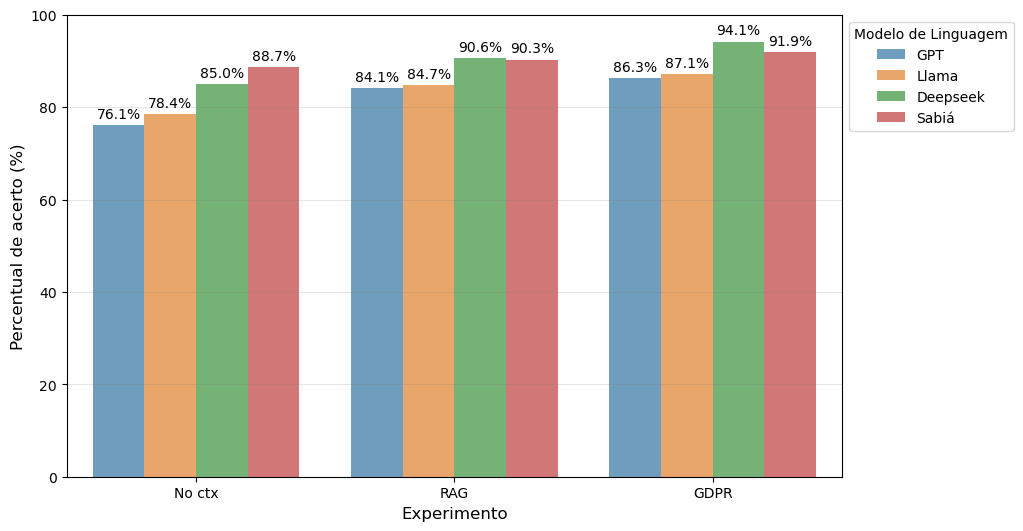

In [33]:
df = pd.DataFrame(data)

# Convertendo para formato longo (melt) para facilitar a plotagem agrupada
df_melted = df.melt(id_vars="Experimento", var_name="Modelo", value_name="Resultado")

# Criando o gráfico de barras (agora agrupado por Experimento)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Experimento", y="Resultado", hue="Modelo", data=df_melted, palette=cm.tab10.colors, alpha=0.7)

# Personalizando o gráfico
plt.ylim(0, 100)  # Garantindo que o eixo Y vá de 0 a 100%
plt.xlabel("Experimento", fontsize=12)
plt.ylabel("Percentual de acerto (%)", fontsize=12)
plt.legend(title="Modelo de Linguagem", loc='upper left', bbox_to_anchor=(1, 1)) 

# Adicionando as linhas de grade em cinza claro
plt.grid(True, axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Adicionando os valores no topo das barras
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%',  # Mostrando o valor com 1 casa decimal
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')  # Ajuste de posição

# Exibindo o gráfico
plt.show()

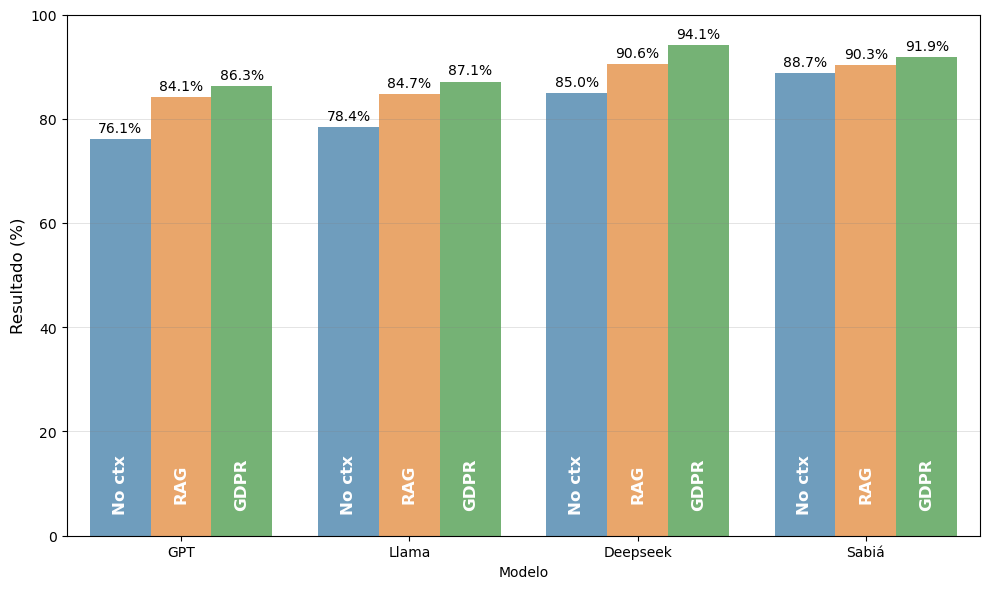

In [62]:
df = pd.DataFrame(data)

# Convertendo para formato longo (melt) para facilitar a plotagem agrupada
df_melted = df.melt(id_vars="Experimento", var_name="Modelo", value_name="Resultado")

# Usando a paleta padrão do Matplotlib e garantindo que alpha = 1 (sem transparência)
plt.figure(figsize=(10, 6))

# Alterando a visualização para agrupar por modelo
ax = sns.barplot(x="Modelo", y="Resultado", hue="Experimento", data=df_melted, palette=cm.tab10.colors, alpha=0.7)

# Personalizando o gráfico
plt.ylim(0, 100)  # Garantindo que o eixo Y vá de 0 a 100%
#plt.xlabel("Modelo de Linguagem", fontsize=12)
plt.ylabel("Resultado (%)", fontsize=12)

# Movendo a legenda para fora do gráfico
#plt.legend(title="Experimento", loc='upper left', bbox_to_anchor=(1, 1))
ax.get_legend().remove()

# Adicionando as linhas de grade em cinza claro
plt.grid(True, axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Adicionando os valores no topo das barras
for p, experiment in zip(ax.patches, ["No ctx"]*4 + ["RAG"]*4 + ["GDPR"]*4):
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%',  # Mostrando o valor com 1 casa decimal
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')  # Ajuste de posição
        ax.annotate(experiment,  # O nome do experimento
                    (p.get_x() + p.get_width() / 2., 10),  # Posição no meio da barra
                    ha='center', va='center', 
                    fontsize=12, color='white', 
                    fontweight='bold',
                    rotation=90)  # Rotacionando o texto para 90 graus
        

    
# Ajustando layout para não cortar a legenda
plt.tight_layout()

# Exibindo o gráfico
plt.show()